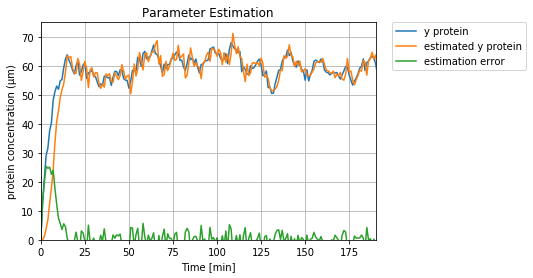

In [4]:
#Jeremy Reiser CSE4095 Assignment 3
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests

N = 200                  # total number of data points
x = np.tile(0.0, N)      # x protein concentration (uM)
y = np.tile(0.0, N)      # y protein concentration (uM)
X = 30                   # constant x protein concentration
x[0] = X                 # initial x protein concentration
y[0] = 0                 # initial y protein concentration
pXY = 0.4                # production parameter
pY = 0.8                 # degradation/dilution parameter

    # fake data generation
for n in range (0, N-1):   # N-1 loops (1 loop = 1 min)
    x[n] = X + 2*np.random.normal()
    y[n] = pXY*x[n-1] + pY*y[n-1] + 2*np.random.normal()


    # adaptive parameter estimation (Least Mean Squares (LMS) method)
est_pXY = np.tile(0.0, N)      # estimated production parameter set
est_pY = np.tile(0.0, N)       # estimated degradation/dilution parameter set
est_y = np.tile(0.0, N)        # y protein concentration (uM)
error = np.tile(0.0, N)        # estimation error (y - est_y)

est_pXY[1] = 0           # initial guess for pXY
est_pY[1] = 0            # initial guess for pY
u = 0.0001               # step size

for n in range (0, N-2): # N-2 loops (1 loop = 1 min)
    est_y[n] = est_pXY[n]*x[n-1] + est_pY[n]*y[n-1]
    error[n] = y[n]-est_y[n]
    est_pXY[n+1] = est_pXY[n] + u*x[n-1]*error[n]
    est_pY[n+1] = est_pY[n] + u*y[n-1]*error[n]
    
# Data plotted
t = np.arange(0.0, 200, 1)               #sets time interval

fig, ax = plt.subplots()
ax.plot(t, y)                               #plots y vs. t 
ax.plot(t, est_y)                               #plots estimated y vs. t
ax.plot(t, error)                               #plots error vs. t

ax.set(xlabel='Time [min]', ylabel='protein concentration (\u03BCm)',
       title='Parameter Estimation')

plt.legend(('y protein', 'estimated y protein', 'estimation error'),                 #creates legend
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlim(0, 190)
ax.set_ylim(0, 75)

ax.grid()

fig.savefig("Parameter Estimation")
plt.show()